Function 8: High-dimensional Optimisation
You’ve reach the final, 8-dimensional search space. High-dimensional black-box optimisation can be very difficult, so sticking to local solutions is not the worst idea here.

In [1]:
# update data weekly
import numpy as np
import os

# Function number (update this as needed)
function_id = 8  # change for f2, f3, etc.

# Load original data
inputs_path = f'function_{function_id}/initial_inputs.npy'
outputs_path = f'function_{function_id}/initial_outputs.npy'
inputs = np.load(inputs_path)
outputs = np.load(outputs_path)

# Load new data (replace this with your actual new submissions)
# Example: new 2D point with corresponding output
# week1:0.534609	0.472150	0.515970	0.430449	0.468951	0.460126	0.579196	0.506720 and	8.648043263
# week2:0.009077	0.145739	0.022929	0.009043	0.894396	0.299269	0.035909	0.413200 and	9.827097014
# week3_1: 0.009077	0.511480	0.022929	0.338311	0.570293	0.614175	0.035909	0.762015 and 9.687049413764
# week3_2: 0.009077	0.145739	0.012929	0.009043	0.894396	0.599269	0.035909	0.453200 and	9.852145754
# w4-1t: 0.009577	0.003419	0.022929	0.321403	0.699415	0.964034	0.036909	0.087965 and	9.59858823
# w4-2f: 0.445272	0.003419	0.012929	0.221403	0.799415	0.964034	0.036909	0.445272 and	9.422954109
# w5-1t: 0.009077	0.003419	0.012929	0.009043	0.093177	0.277112	0.035909	0.445272 and	9.5452700684401
# w5-2f: 0.201988	0.345293	0.012929	0.450802	0.670251	0.193692	0.104291	0.041956 and	9.6577551112159
# w6-1t: 0.009077	0.003419	0.012929	0.516451	0.986902	0.612115	0.318316	0.648033 and  9.7283128134091
# w6-2f: 0.005077	0.125739	0.012929	0.009043	0.894396	0.599269	0.035909	0.453200 and 9.850088545718
# w7-1t: 0.008077	0.124739	0.012929	0.009043	0.897396	0.599269	0.035909	0.453200 and 9.850872412
# w7-2f: 0.009077	0.123739	0.012929	0.009043	0.897396	0.598269	0.035909	0.454200 and  9.851413
# w8-1t: 0.009177	0.140739	0.012929	0.009043	0.898396	0.599269	0.035909	0.453200 and  9.85087241171799
# w8-2f: 0.009077	0.125739	0.012929	0.009043	0.897096	0.598069	0.035909	0.454000 and 9.851577029118
# w9-1t: 0.009177	0.145639	0.012929	0.009143	0.894396	0.599269	0.035909	0.453200 and 9.852209422118
# W9-2f: 0.009177	0.145639	0.012929	0.009143	0.894396	0.599369	0.035909	0.452200 and 9.852160
# w10-1t: 0.009178	0.145639	0.012529	0.009143	0.894396	0.599169	0.035709	0.453100 and 9.851813889008
# w10-2f: 0.158142	0.158142	0.012929	0.009043	0.711073	0.236295	0.440294	0.410539 and 9.739621

new_inputs = np.array([[0.158142, 0.158142, 0.012929, 0.009043, 0.711073, 0.236295, 0.440294, 0.410539]])
new_outputs = np.array([9.7396206979224])

# Concatenate new data to existing
updated_inputs = np.vstack([inputs, new_inputs])
updated_outputs = np.concatenate([outputs, new_outputs])
print("updated_inputs shape:", updated_inputs.shape)
print("updated_outputs shape:", updated_outputs.shape)
# Optionally: save backup copies before overwriting
np.save(f'function_{function_id}/backup_inputs.npy', inputs)
np.save(f'function_{function_id}/backup_outputs.npy', outputs)

# Save updated files
np.save(inputs_path, updated_inputs)
np.save(outputs_path, updated_outputs)

print("Updated data saved.")

updated_inputs shape: (58, 8)
updated_outputs shape: (58,)
Updated data saved.


C:\Users\grant\anaconda3\Lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Suggested next best input (high-dimensional): [0.1755598  0.34271481 0.012529   0.009043   0.4754703  0.02211341
 0.035709   0.9887551 ]
Suggested next best input (6 decimals): ['0.175560', '0.342715', '0.012529', '0.009043', '0.475470', '0.022113', '0.035709', '0.988755']
Predicted output at next suggested input: 9.579088436503003 ± 0.3339992844693159


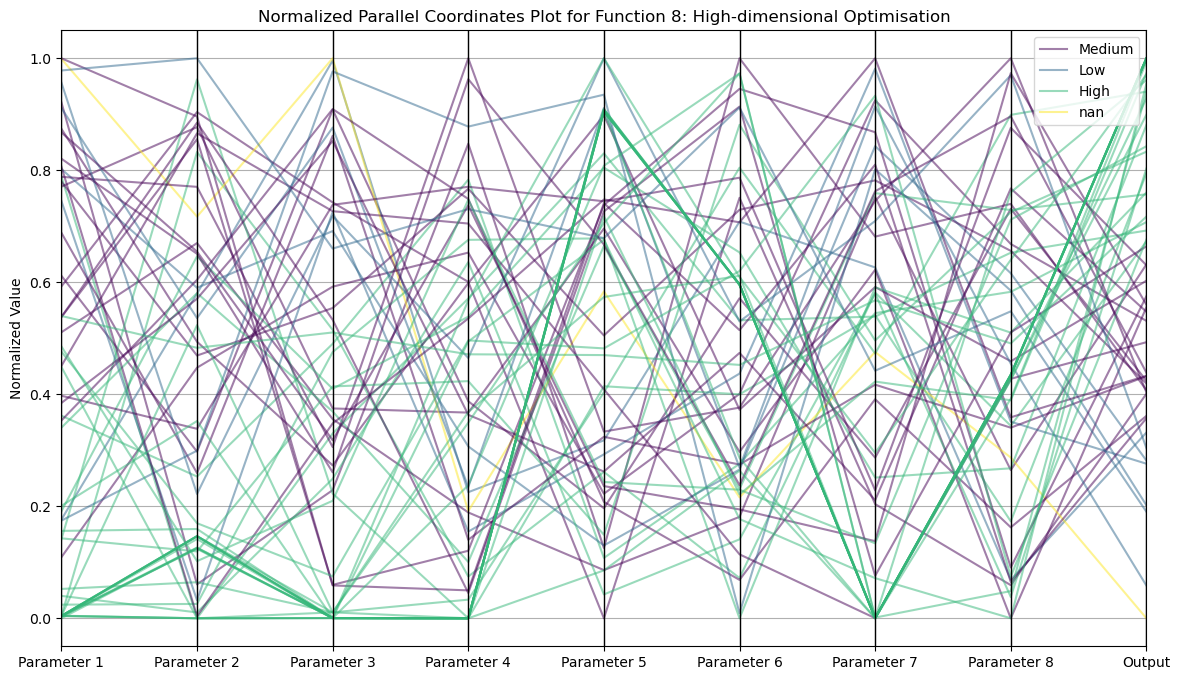

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
from scipy.optimize import minimize
from sklearn.preprocessing import MinMaxScaler

# Load the initial data
inputs_f8 = np.load('function_8/initial_inputs.npy')
outputs_f8 = np.load('function_8/initial_outputs.npy')

# Gaussian Process Regression Model with Matern kernel
gp = GaussianProcessRegressor(kernel=Matern(nu=2.5), n_restarts_optimizer=10, normalize_y=True)
gp.fit(inputs_f8, outputs_f8)

# Upper Confidence Bound (UCB) acquisition function for maximization
def upper_confidence_bound(x, gp, kappa=2.576):
    mean, std = gp.predict(x.reshape(1, -1), return_std=True)
    return -(mean + kappa * std)

# Optimization bounds based on observed data
bounds = [(np.min(inputs_f8[:, i]), np.max(inputs_f8[:, i])) for i in range(inputs_f8.shape[1])]

# Optimize UCB to find next best input (local optimization recommended)
result = minimize(upper_confidence_bound,
                  x0=np.mean(inputs_f8, axis=0),
                  args=(gp,),
                  bounds=bounds,
                  method='L-BFGS-B')

# Next best input prediction
next_best_input = result.x
print("Suggested next best input (high-dimensional):", next_best_input)
print("Suggested next best input (6 decimals):", [f"{x:.6f}" for x in next_best_input])

# Predicted output at suggested input
predicted_output, predicted_std = gp.predict(next_best_input.reshape(1, -1), return_std=True)
print("Predicted output at next suggested input:", predicted_output[0], "±", predicted_std[0])

# Optional visualization: Parallel Coordinates Plot for high-dimensional insight
import pandas as pd
from pandas.plotting import parallel_coordinates

feature_columns = [f'Parameter {i+1}' for i in range(inputs_f8.shape[1])]
data_f8 = pd.DataFrame(inputs_f8, columns=feature_columns)
data_f8['Output'] = outputs_f8

# Normalizing for visualization
scaler = MinMaxScaler()
data_f8_normalized = pd.DataFrame(scaler.fit_transform(data_f8), columns=data_f8.columns)

# Categorize outputs
bins = np.linspace(data_f8_normalized['Output'].min(), data_f8_normalized['Output'].max(), 4)
data_f8_normalized['Output Level'] = pd.cut(data_f8_normalized['Output'], bins, labels=['Low', 'Medium', 'High'])

# Parallel coordinates plot
plt.figure(figsize=(14, 8))
parallel_coordinates(data_f8_normalized, class_column='Output Level', colormap='viridis', alpha=0.5)
plt.title('Normalized Parallel Coordinates Plot for Function 8: High-dimensional Optimisation')
plt.ylabel('Normalized Value')
plt.grid(True)
plt.show()


Suggested next best input (high-dimensional): [0.15807184 0.003419   0.012929   0.009043   0.71096615 0.23621322
 0.44033546 0.41063257]
Suggested next best input (6 decimals): ['0.158072', '0.003419', '0.012929', '0.009043', '0.710966', '0.236213', '0.440335', '0.410633']
Predicted output at next suggested input: 9.884524581255201 ± 0.19263564952345724

Second suggested input (high-dimensional): [0.15814192 0.003419   0.012929   0.009043   0.71107293 0.23629538
 0.44029392 0.41053898]
Second suggested input (6 decimals): ['0.158142', '0.003419', '0.012929', '0.009043', '0.711073', '0.236295', '0.440294', '0.410539']
Predicted output at second suggested input: 9.884560462760874 ± 0.19262170988345284


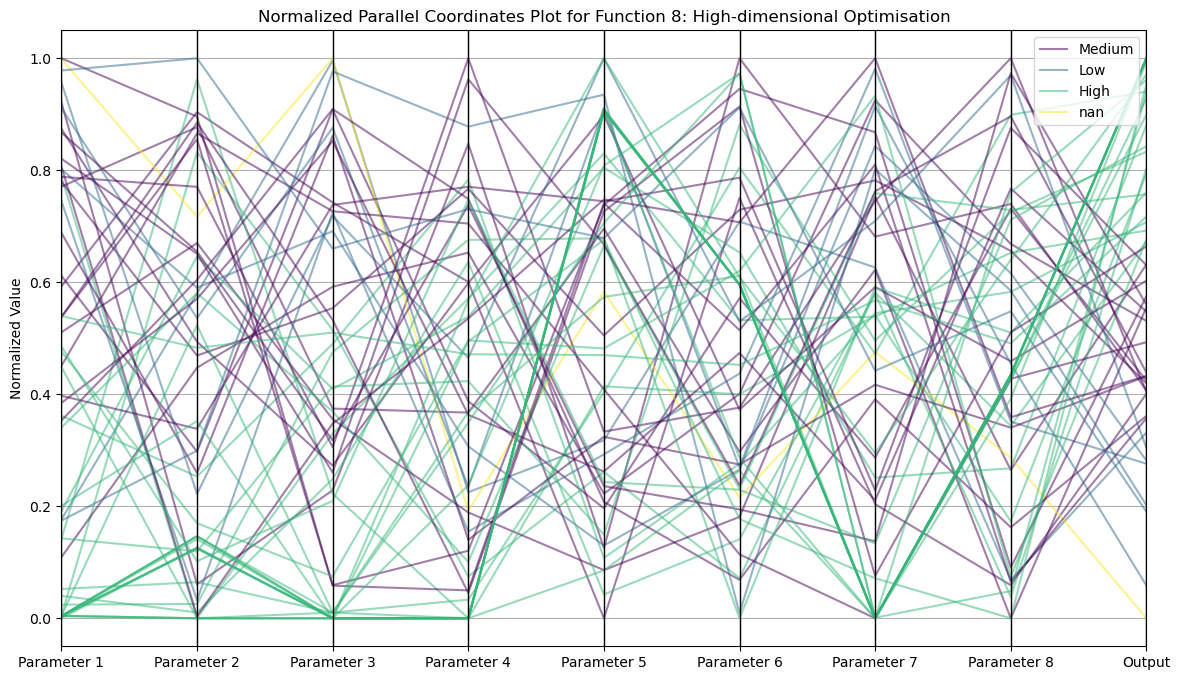

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
from scipy.optimize import minimize, differential_evolution
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from pandas.plotting import parallel_coordinates

# Load the initial data
inputs_f8 = np.load('function_8/initial_inputs.npy')
outputs_f8 = np.load('function_8/initial_outputs.npy')

# Gaussian Process Regression Model with Matern kernel
gp = GaussianProcessRegressor(kernel=Matern(nu=2.5), n_restarts_optimizer=10, normalize_y=True)
gp.fit(inputs_f8, outputs_f8)

# Upper Confidence Bound (UCB) acquisition function for maximization
def upper_confidence_bound(x, gp, kappa=2.576):
    mean, std = gp.predict(x.reshape(1, -1), return_std=True)
    return -(mean + kappa * std)

# Optimization bounds based on observed data
bounds = [(np.min(inputs_f8[:, i]), np.max(inputs_f8[:, i])) for i in range(inputs_f8.shape[1])]

# First suggestion using global optimization
result1 = differential_evolution(lambda x: upper_confidence_bound(x, gp), bounds)
next_best_input1 = result1.x
predicted_output1, predicted_std1 = gp.predict(next_best_input1.reshape(1, -1), return_std=True)

print("Suggested next best input (high-dimensional):", next_best_input1)
print("Suggested next best input (6 decimals):", [f"{x:.6f}" for x in next_best_input1])
print("Predicted output at next suggested input:", predicted_output1[0], "±", predicted_std1[0])

# Second suggestion using another global optimization run with different seed
result2 = differential_evolution(lambda x: upper_confidence_bound(x, gp), bounds, seed=42)
next_best_input2 = result2.x
predicted_output2, predicted_std2 = gp.predict(next_best_input2.reshape(1, -1), return_std=True)

print("\nSecond suggested input (high-dimensional):", next_best_input2)
print("Second suggested input (6 decimals):", [f"{x:.6f}" for x in next_best_input2])
print("Predicted output at second suggested input:", predicted_output2[0], "±", predicted_std2[0])

# Optional visualization: Parallel Coordinates Plot for high-dimensional insight
feature_columns = [f'Parameter {i+1}' for i in range(inputs_f8.shape[1])]
data_f8 = pd.DataFrame(inputs_f8, columns=feature_columns)
data_f8['Output'] = outputs_f8

# Normalizing for visualization
scaler = MinMaxScaler()
data_f8_normalized = pd.DataFrame(scaler.fit_transform(data_f8), columns=data_f8.columns)

# Categorize outputs
bins = np.linspace(data_f8_normalized['Output'].min(), data_f8_normalized['Output'].max(), 4)
data_f8_normalized['Output Level'] = pd.cut(data_f8_normalized['Output'], bins, labels=['Low', 'Medium', 'High'])

# Parallel coordinates plot
plt.figure(figsize=(14, 8))
parallel_coordinates(data_f8_normalized, class_column='Output Level', colormap='viridis', alpha=0.5)
plt.title('Normalized Parallel Coordinates Plot for Function 8: High-dimensional Optimisation')
plt.ylabel('Normalized Value')
plt.grid(True)
plt.show()